In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import cv2
import random

In [2]:
folder = "../CK+/"
images = join(folder, 'cohn-kanade-images')
landmarks = join(folder, 'Landmarks')
labels = join(folder, "Emotion")

In [3]:
data = {"neutral": [], "peak": [], "label": [], "lm_neutral": [], "lm_peak": []}

for subject in os.listdir(images):
    for edir in os.listdir(join(images, subject)):
        midpath = join(subject, edir)
        # get the relevant paths
        imagedir = join(images, midpath)
        if not os.path.isdir(imagedir):
            continue
        labeldir = join(labels, midpath)
        landdir = join(landmarks, midpath)
        # extract the first and the last images
        imagenames = sorted(os.listdir(imagedir))
        names = [join(imagedir, imagenames[0]), join(imagedir, imagenames[-1])]
        # check if the peak frame exists in Emotion dir
        target = join(labeldir, imagenames[-1][:-4]+'_emotion.txt')
        lm_peak = join(landdir, imagenames[-1][:-4]+'_landmarks.txt')
        lm_neutral = join(landdir, imagenames[0][:-4]+'_landmarks.txt')
        if all(os.path.exists(x) for x in (target, lm_peak, lm_neutral) ):
            # then it is one of 326 labelled sequences
            data["neutral"].append(names[0])
            data["peak"].append(names[1])
            data["label"].append(target)
            data['lm_neutral'].append(lm_neutral)
            data['lm_peak'].append(lm_peak)
            

In [4]:
train_df = pd.DataFrame(data)
print(len(train_df))
train_df.head(10)

326


,neutral,peak,label,lm_neutral,lm_peak
0,../CK+/cohn-kanade-images/S063/002/S063_002_00...,../CK+/cohn-kanade-images/S063/002/S063_002_00...,../CK+/Emotion/S063/002/S063_002_00000023_emot...,../CK+/Landmarks/S063/002/S063_002_00000001_la...,../CK+/Landmarks/S063/002/S063_002_00000023_la...
1,../CK+/cohn-kanade-images/S063/001/S063_001_00...,../CK+/cohn-kanade-images/S063/001/S063_001_00...,../CK+/Emotion/S063/001/S063_001_00000013_emot...,../CK+/Landmarks/S063/001/S063_001_00000001_la...,../CK+/Landmarks/S063/001/S063_001_00000013_la...
2,../CK+/cohn-kanade-images/S071/004/S071_004_00...,../CK+/cohn-kanade-images/S071/004/S071_004_00...,../CK+/Emotion/S071/004/S071_004_00000028_emot...,../CK+/Landmarks/S071/004/S071_004_00000001_la...,../CK+/Landmarks/S071/004/S071_004_00000028_la...
3,../CK+/cohn-kanade-images/S071/002/S071_002_00...,../CK+/cohn-kanade-images/S071/002/S071_002_00...,../CK+/Emotion/S071/002/S071_002_00000020_emot...,../CK+/Landmarks/S071/002/S071_002_00000001_la...,../CK+/Landmarks/S071/002/S071_002_00000020_la...
4,../CK+/cohn-kanade-images/S071/006/S071_006_00...,../CK+/cohn-kanade-images/S071/006/S071_006_00...,../CK+/Emotion/S071/006/S071_006_00000014_emot...,../CK+/Landmarks/S071/006/S071_006_00000001_la...,../CK+/Landmarks/S071/006/S071_006_00000014_la...
5,../CK+/cohn-kanade-images/S071/005/S071_005_00...,../CK+/cohn-kanade-images/S071/005/S071_005_00...,../CK+/Emotion/S071/005/S071_005_00000021_emot...,../CK+/Landmarks/S071/005/S071_005_00000001_la...,../CK+/Landmarks/S071/005/S071_005_00000021_la...
6,../CK+/cohn-kanade-images/S071/001/S071_001_00...,../CK+/cohn-kanade-images/S071/001/S071_001_00...,../CK+/Emotion/S071/001/S071_001_00000013_emot...,../CK+/Landmarks/S071/001/S071_001_00000001_la...,../CK+/Landmarks/S071/001/S071_001_00000013_la...
7,../CK+/cohn-kanade-images/S088/004/S088_004_00...,../CK+/cohn-kanade-images/S088/004/S088_004_00...,../CK+/Emotion/S088/004/S088_004_00000020_emot...,../CK+/Landmarks/S088/004/S088_004_00000001_la...,../CK+/Landmarks/S088/004/S088_004_00000020_la...
8,../CK+/cohn-kanade-images/S088/001/S088_001_00...,../CK+/cohn-kanade-images/S088/001/S088_001_00...,../CK+/Emotion/S088/001/S088_001_00000017_emot...,../CK+/Landmarks/S088/001/S088_001_00000001_la...,../CK+/Landmarks/S088/001/S088_001_00000017_la...
9,../CK+/cohn-kanade-images/S050/004/S050_004_00...,../CK+/cohn-kanade-images/S050/004/S050_004_00...,../CK+/Emotion/S050/004/S050_004_00000021_emot...,../CK+/Landmarks/S050/004/S050_004_00000001_la...,../CK+/Landmarks/S050/004/S050_004_00000021_la...


In [5]:
train_df.to_csv("CKpaths.csv",  index = False)
train_df.head()

,neutral,peak,label,lm_neutral,lm_peak
0,../CK+/cohn-kanade-images/S063/002/S063_002_00...,../CK+/cohn-kanade-images/S063/002/S063_002_00...,../CK+/Emotion/S063/002/S063_002_00000023_emot...,../CK+/Landmarks/S063/002/S063_002_00000001_la...,../CK+/Landmarks/S063/002/S063_002_00000023_la...
1,../CK+/cohn-kanade-images/S063/001/S063_001_00...,../CK+/cohn-kanade-images/S063/001/S063_001_00...,../CK+/Emotion/S063/001/S063_001_00000013_emot...,../CK+/Landmarks/S063/001/S063_001_00000001_la...,../CK+/Landmarks/S063/001/S063_001_00000013_la...
2,../CK+/cohn-kanade-images/S071/004/S071_004_00...,../CK+/cohn-kanade-images/S071/004/S071_004_00...,../CK+/Emotion/S071/004/S071_004_00000028_emot...,../CK+/Landmarks/S071/004/S071_004_00000001_la...,../CK+/Landmarks/S071/004/S071_004_00000028_la...
3,../CK+/cohn-kanade-images/S071/002/S071_002_00...,../CK+/cohn-kanade-images/S071/002/S071_002_00...,../CK+/Emotion/S071/002/S071_002_00000020_emot...,../CK+/Landmarks/S071/002/S071_002_00000001_la...,../CK+/Landmarks/S071/002/S071_002_00000020_la...
4,../CK+/cohn-kanade-images/S071/006/S071_006_00...,../CK+/cohn-kanade-images/S071/006/S071_006_00...,../CK+/Emotion/S071/006/S071_006_00000014_emot...,../CK+/Landmarks/S071/006/S071_006_00000001_la...,../CK+/Landmarks/S071/006/S071_006_00000014_la...


In [6]:
def listFromFile(file):
    result = []
    with open(file, 'r') as file:
        for line in file:
            point = tuple(map(float, line.rstrip().split()))
            result.append(point)
    return result

def markImage(impath, lmpath):
    image = Image.open(impath).convert('L')
    w,h = image.size
    image = image.resize((2*w, 2*h))
    image = np.array(image, dtype = np.uint8 )
    lands = listFromFile(lmpath)
    for i, point in enumerate(lands):
        point = 2*int(point[0]), 2*int(point[1])
        image = cv2.circle(image, point, 2, 0, 4)
        image = cv2.putText(image, str(i), point, cv2.FONT_HERSHEY_SIMPLEX, 1, 0, 2)
    return image

Text(0.5, 1.0, 'Peak S157_002_00000011.png')

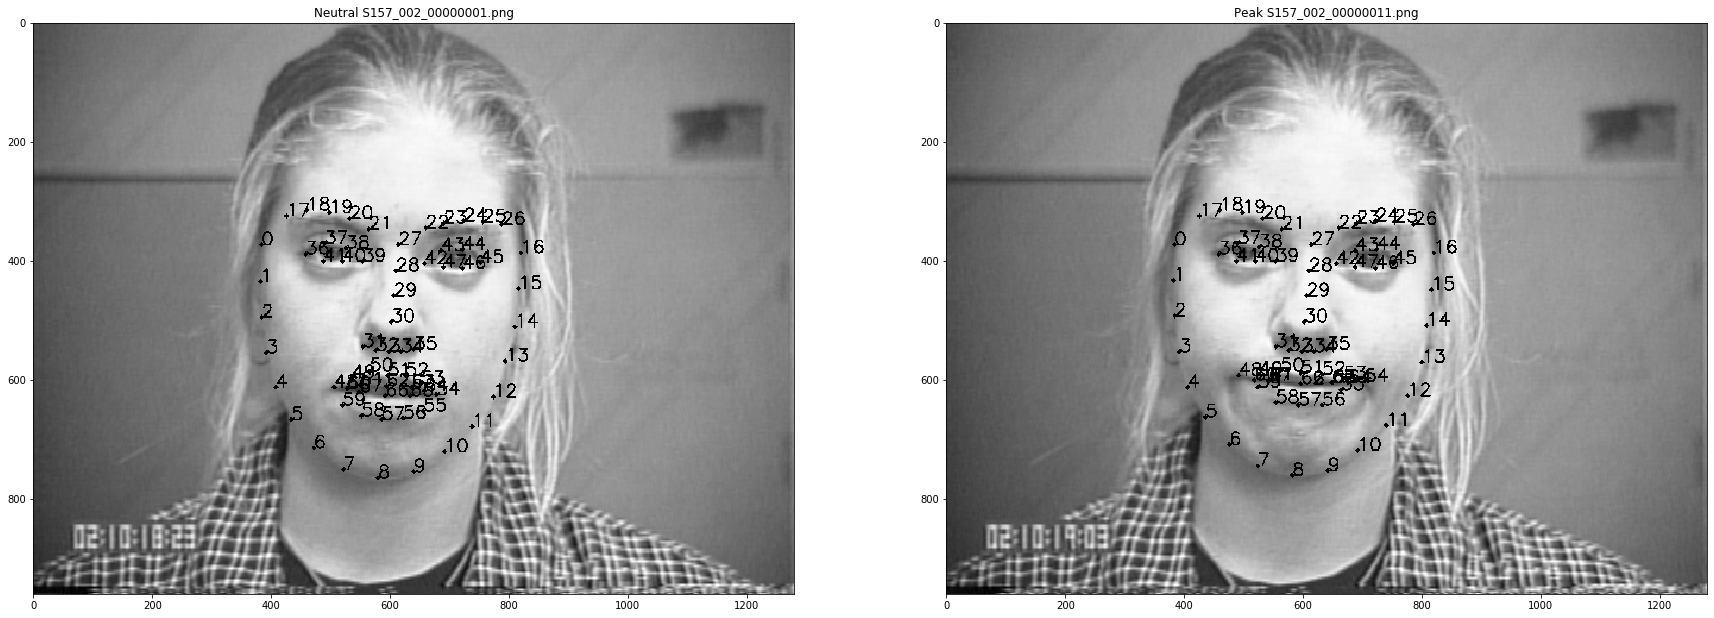

In [16]:
# r = random.randint(0, 325)
# r = 32
r = 52
# print(f"Index is {r}")
# get path from csv
# def labelFromFile(labelpath):
#     with open(labelpath, 'r') as file:
#         return (int(float(file.read().rstrip().split()[0])))
# train_df.label = list(map(labelFromFile, train_df.label))
train_df = train_df[train_df["label"]==2].head()
npath, ppath = train_df["neutral"][r], train_df["peak"][r]

# open the images
neutral = markImage(npath, train_df["lm_neutral"][r])
peak = markImage(ppath, train_df["lm_peak"][r])

#plot the images side by side
fig, axs = plt.subplots(1,2, figsize=(30,15))
axs[0].imshow(neutral, cmap='gray', vmin=0, vmax=255)
axs[0].set_title(f"Neutral { npath.split('/')[-1] }")
axs[1].imshow(peak, cmap='gray', vmin=0, vmax=255)
axs[1].set_title(f"Peak {ppath.split('/')[-1]}")

In [15]:
train_df.head(10)

,neutral,peak,label,lm_neutral,lm_peak
43,../CK+/cohn-kanade-images/S147/002/S147_002_00...,../CK+/cohn-kanade-images/S147/002/S147_002_00...,2,../CK+/Landmarks/S147/002/S147_002_00000001_la...,../CK+/Landmarks/S147/002/S147_002_00000013_la...
52,../CK+/cohn-kanade-images/S157/002/S157_002_00...,../CK+/cohn-kanade-images/S157/002/S157_002_00...,2,../CK+/Landmarks/S157/002/S157_002_00000001_la...,../CK+/Landmarks/S157/002/S157_002_00000011_la...
75,../CK+/cohn-kanade-images/S149/002/S149_002_00...,../CK+/cohn-kanade-images/S149/002/S149_002_00...,2,../CK+/Landmarks/S149/002/S149_002_00000001_la...,../CK+/Landmarks/S149/002/S149_002_00000013_la...
109,../CK+/cohn-kanade-images/S160/006/S160_006_00...,../CK+/cohn-kanade-images/S160/006/S160_006_00...,2,../CK+/Landmarks/S160/006/S160_006_00000001_la...,../CK+/Landmarks/S160/006/S160_006_00000010_la...
120,../CK+/cohn-kanade-images/S154/002/S154_002_00...,../CK+/cohn-kanade-images/S154/002/S154_002_00...,2,../CK+/Landmarks/S154/002/S154_002_00000001_la...,../CK+/Landmarks/S154/002/S154_002_00000013_la...
